# Midterm 2 
## Demetrios Lambropoulos

## Part 0 - Setup

In [0]:
# Import important library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import API to split dataset
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# Import the library for k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

# Import library to compute cross validation scores
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import the SKLearn metric libraries 
from sklearn.metrics import confusion_matrix, accuracy_score, \
                            precision_score, recall_score

from sklearn.metrics import auc, roc_curve, roc_auc_score

In [0]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [0]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [0]:
t = df
t = t.replace(r'\s+',np.nan,regex=True).replace('',np.nan)
df['TotalCharges'] = t['TotalCharges']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [0]:
df['TotalCharges'].dtype

dtype('float64')

## Part 1

### Visualize the Continuous Variables 

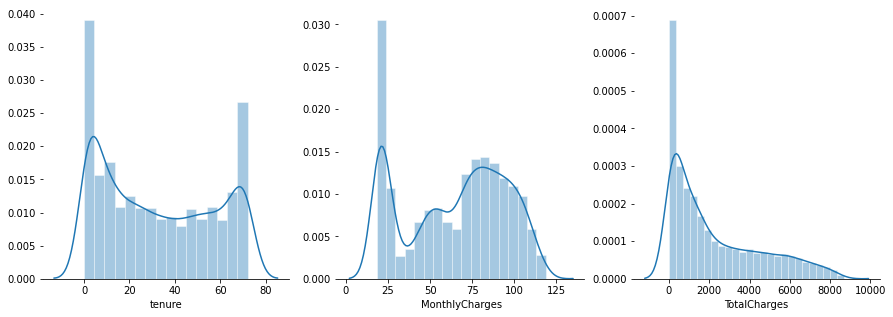

In [0]:
# Set up the matplotlib figure
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharex=False)
sns.despine(left=True)

sns.set(color_codes=True)
sns.distplot(df.tenure, ax=axes[0])
sns.distplot(df['MonthlyCharges'], ax=axes[1])
sns.distplot(df['TotalCharges'], ax=axes[2])

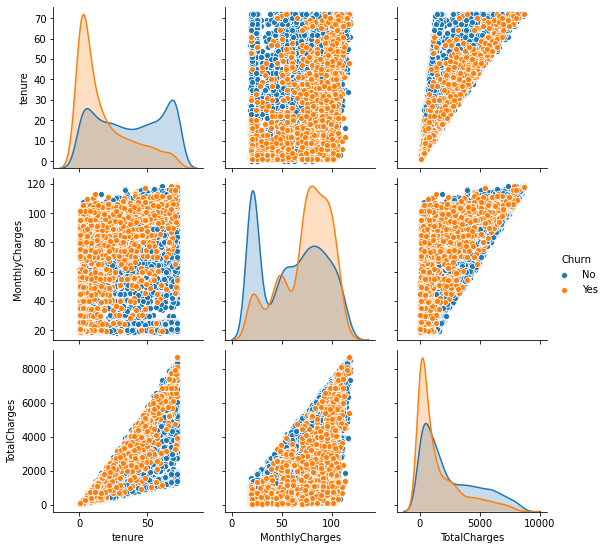

In [0]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

### Visualize the Categorical Variables

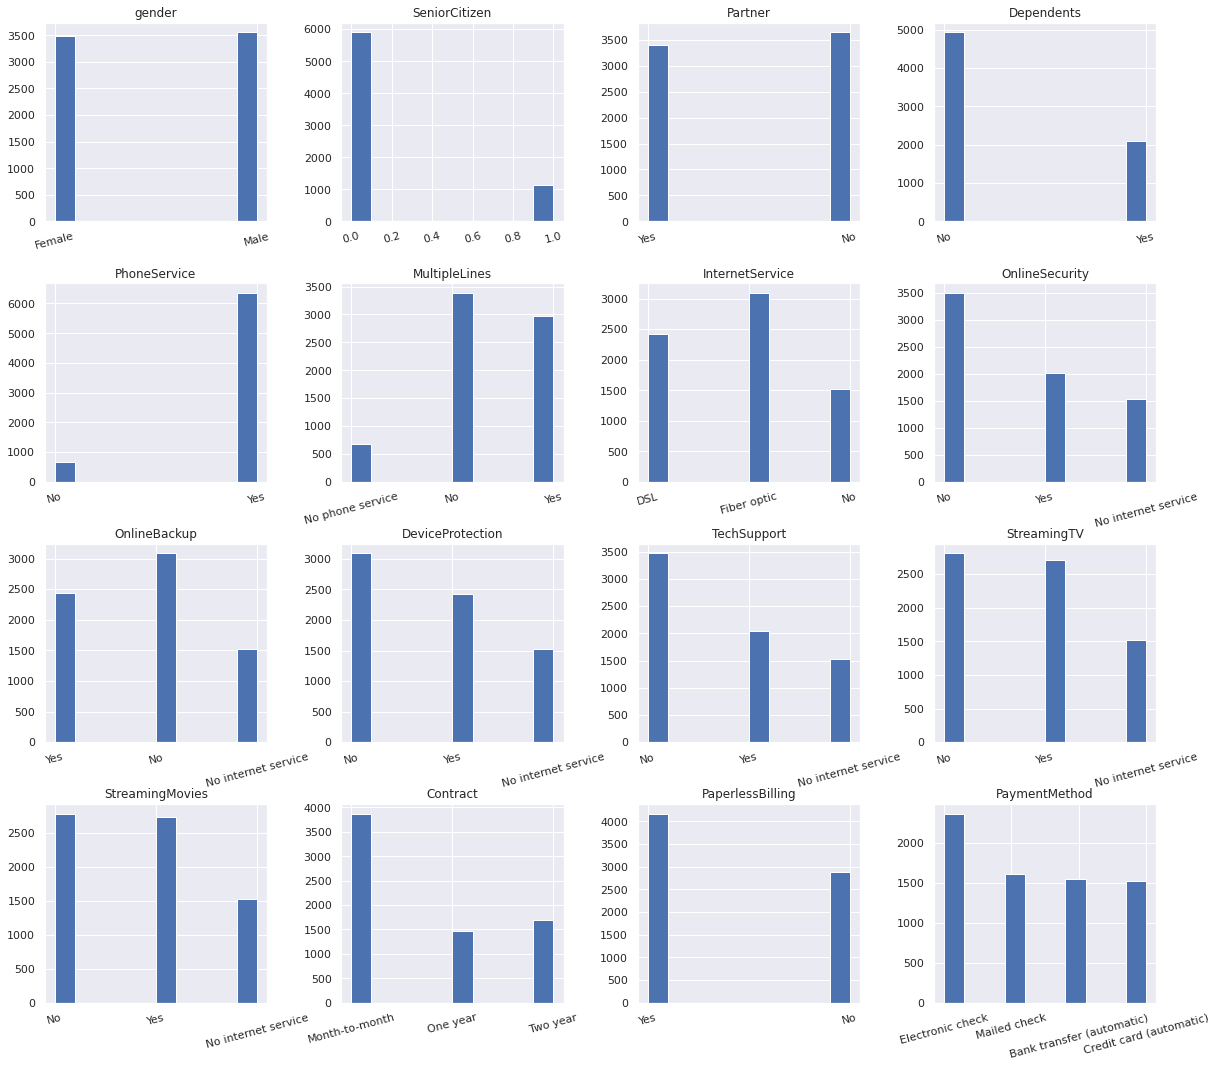

In [0]:
# Set up the matplotlib figure
f, axes = plt.subplots(nrows=4, ncols=4, figsize=(17,15), sharex=False)

i = 0
j = 0
f.tight_layout(pad=3.2)
for variable in categorical:
  axes[i,j%4].hist(df[variable])
  axes[i,j%4].set_title(variable)
  j = j + 1
  if j%4 == 0:
    i = i + 1

for ax in f.axes:
  plt.sca(ax)
  plt.xticks(rotation=15)

### Visualize the Target Variable

(array([5174.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

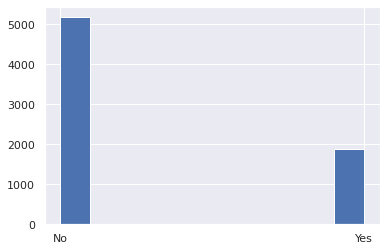

In [0]:
plt.hist(df['Churn'])

## Part 2

### Split Data Set into Test and Train Sets

In [0]:
# Split into 80/20 split for training and testing
df_train, df_test = train_test_split(df, test_size=0.2)

### Evaluate models

In [0]:
#categorical = df_train.dtypes == object

preprocessing = make_column_transformer(
    (SimpleImputer(), numerical),
    (OneHotEncoder(handle_unknown='ignore'), categorical)
)

model1 = make_pipeline(preprocessing, LogisticRegression(solver='lbfgs', max_iter=350))
model2 = make_pipeline(preprocessing, KNeighborsClassifier())
model3 = make_pipeline(preprocessing, DecisionTreeClassifier())
model4 = make_pipeline(preprocessing, svm.LinearSVC())

drop = ['Churn']
            
X = df_train.drop(drop, axis=1)
y = df_train['Churn']

print("Displaying Accuracy for Logistic Regression" )
scores = cross_val_score(model1, X, y, scoring='accuracy')
print("Average Accuracy score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

print("Displaying Accuracy for KNeighbors Classifier" )
scores = cross_val_score(model2, X, y, scoring='accuracy')
print("Average Accuracy score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

print("Displaying Accuracy for DecisionTree Classifier" )
scores = cross_val_score(model3, X, y, scoring='accuracy')
print("Average Accuracy score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

print("Displaying Accuracy for Linear SVM" )
scores = cross_val_score(model4, X, y, scoring='accuracy')
print("Average Accuracy score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

Displaying Accuracy for Logistic Regression
Average Accuracy score: 0.80476 (+/- 0.02056)
Displaying Accuracy for KNeighbors Classifier
Average Accuracy score: 0.76429 (+/- 0.01380)
Displaying Accuracy for DecisionTree Classifier
Average Accuracy score: 0.73074 (+/- 0.00975)
Displaying Accuracy for Linear SVM


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Average Accuracy score: 0.68567 (+/- 0.12694)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
preprocessing = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numerical),
    (OneHotEncoder(handle_unknown='ignore'), categorical)
)

model1 = make_pipeline(preprocessing, LogisticRegression(solver='lbfgs', max_iter=350))
model2 = make_pipeline(preprocessing, KNeighborsClassifier())
model3 = make_pipeline(preprocessing, DecisionTreeClassifier())
model4 = make_pipeline(preprocessing, svm.LinearSVC())

drop = ['Churn']
            
X = df_train.drop(drop, axis=1)
y = df_train['Churn']

print("Displaying Accuracy for Logistic Regression" )
scores = cross_val_score(model1, X, y, scoring='accuracy')
print("Average Accuracy score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

print("Displaying Accuracy for KNeighbors Classifier" )
scores = cross_val_score(model2, X, y, scoring='accuracy')
print("Average Accuracy score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

print("Displaying Accuracy for DecisionTree Classifier" )
scores = cross_val_score(model3, X, y, scoring='accuracy')
print("Average Accuracy score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

print("Displaying Accuracy for Linear SVM" )
scores = cross_val_score(model4, X, y, scoring='accuracy')
print("Average Accuracy score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

Displaying Accuracy for Logistic Regression
Average Accuracy score: 0.80316 (+/- 0.01601)
Displaying Accuracy for KNeighbors Classifier
Average Accuracy score: 0.76145 (+/- 0.01407)
Displaying Accuracy for DecisionTree Classifier
Average Accuracy score: 0.72559 (+/- 0.01224)
Displaying Accuracy for Linear SVM
Average Accuracy score: 0.79890 (+/- 0.02314)


The results for logistic regression had the highest accuracy out of all four models, with slightly above $80\%$ accuracy with a standard deviation of around $2\%$. The Linear SVM had trouble converging with the given variables and predicted with the worst accuracy of $50\%$ with a standard deviation of $36\%$. After applying a StandardScalar to the continous variables, the decision tree classifier and the Logistic regression showed very little improvement or overall change in their predictions. Linear SVM showed the greated improvement, first it was able to converge within the default amount of iterations and also experienced a $29\%$ increase in accuracy of predictions. The standard deviation of the accuracy for the Linear SVM was reduced by about $33\%$. The KNeighbors Classifier had a $1\%$ increase in accuracy however experienced a $1\%$ increase in standard deviation.

## Part 3

### Tune Model Parameters

In [0]:
logistic_params = {'logisticregression__C':[100, 10, 1.0, 0.1, 0.01]}
knn_params = {'kneighborsclassifier__n_neighbors':list(range(1,30))}
svm_params = {'linearsvc__C': [0.001, 0.01, 0.1, 1, 10]}
LogisticTest = GridSearchCV(model1, logistic_params)
KNeighborTest = GridSearchCV(model2, knn_params)
LinSVMTest = GridSearchCV(model4, svm_params)

In [0]:
LogisticTest.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                 

In [0]:
LinSVMTest.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                 

In [0]:
KNeighborTest.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                 

### Visualize Performance of Logistic Regression 

(0.8, 1.2)

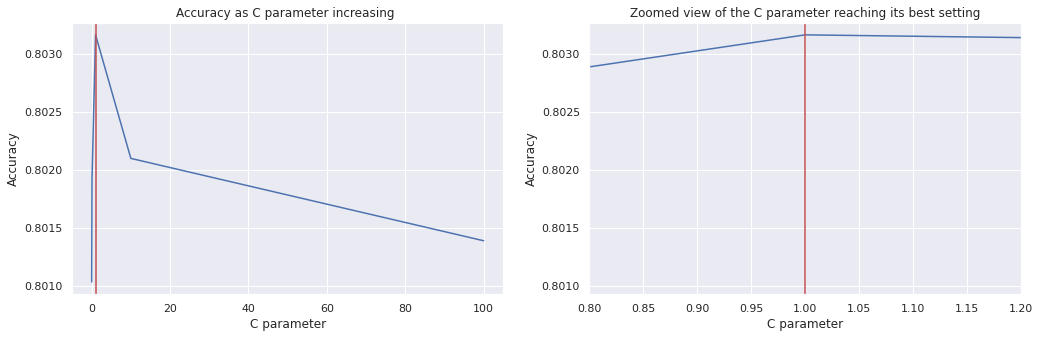

In [0]:
# List of C values for this Logistic Regression
x = [100, 10, 1.0, 0.1, 0.01]

# Convert the GridSearchCV results to a DataFrame
grid = pd.DataFrame(LogisticTest.cv_results_)

# Set up a subplot with a 1x2 axis
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5), sharex=False)

# Get the best value for the parameter found
best = list(LogisticTest.best_params_.values())[0]

# In subplot 1, display the accuracy as C is increased
axes[0].plot(x,grid['mean_test_score'])
axes[0].set_title('Accuracy as C parameter increasing ')
axes[0].set_xlabel('C parameter')
axes[0].set_ylabel('Accuracy')
axes[0].axvline(best, c='r')

# In subplot 2, display the accuracy as C is increased, zoomed at the best param
axes[1].plot(x,grid['mean_test_score'])
axes[1].set_title('Zoomed view of the C parameter reaching its best setting')
axes[1].set_xlabel('C parameter')
axes[1].set_ylabel('Accuracy')
axes[1].axvline(best, c='r')
axes[1].set_xlim(best-best*0.2,best+best*0.2)

### Visualize the performance of Linear SVM

(0.8, 1.2)

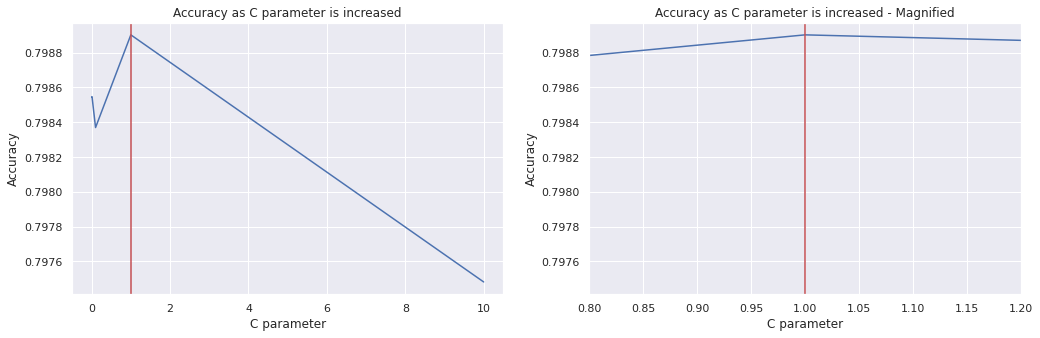

In [0]:
# List of C values to be used for the Linear SVM
x = [0.001, 0.01, 0.1, 1, 10]

# Set up a subplot with a 1x2 axis
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5), sharex=False)

# Convert the GridSearchCV results to a DataFrame
grid = pd.DataFrame(LinSVMTest.cv_results_)

# Get the best value for the parameter found
best = list(LinSVMTest.best_params_.values())[0]

axes[0].plot(x, grid['mean_test_score'])
axes[0].axvline(best, c='r')
axes[0].set_title('Accuracy as C parameter is increased')
axes[0].set_xlabel('C parameter')
axes[0].set_ylabel('Accuracy')
axes[1].plot(x, grid['mean_test_score'])
axes[1].set_title('Accuracy as C parameter is increased - Magnified')
axes[1].set_xlabel('C parameter')
axes[1].set_ylabel('Accuracy')
axes[1].axvline(best, c='r')
axes[1].set_xlim(best-best*0.2,best+best*0.2)

### Visualize the performance of kNN

(23.2, 34.8)

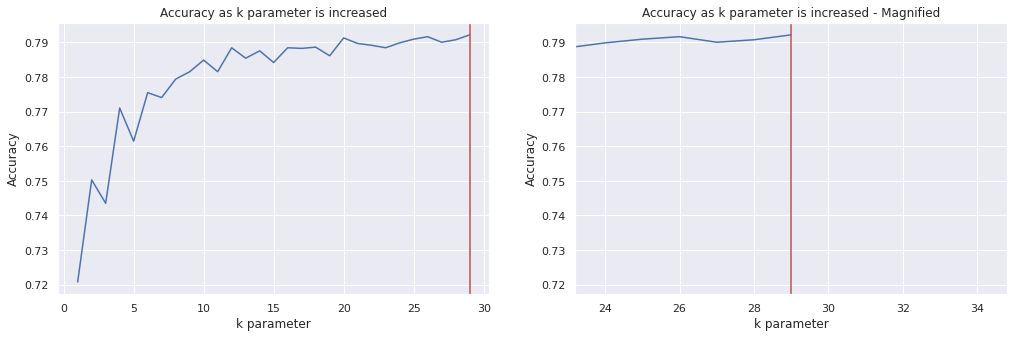

In [0]:
# List of k values to be used for the K Nearest Neighbors Classifier
x = list(range(1,30))

# Set up a subplot with a 1x2 axis
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5), sharex=False)

# Convert the GridSearchCV results to a DataFrame
grid = pd.DataFrame(KNeighborTest.cv_results_)

# Get the best value for the parameter found
best = list(KNeighborTest.best_params_.values())[0]

axes[0].plot(x, grid['mean_test_score'])
axes[0].axvline(best, c='r')
axes[0].set_title('Accuracy as k parameter is increased')
axes[0].set_xlabel('k parameter')
axes[0].set_ylabel('Accuracy')
axes[1].plot(x, grid['mean_test_score'])
axes[1].set_title('Accuracy as k parameter is increased - Magnified')
axes[1].set_xlabel('k parameter')
axes[1].set_ylabel('Accuracy')
axes[1].axvline(best, c='r')
axes[1].set_xlim(best-best*0.2,best+best*0.2)

### Tune DecisionTree Classifier with RandomSearchCV

#### Observing the effect of the `max_depth` parameter

{'decisiontreeclassifier__max_depth': 4.0}

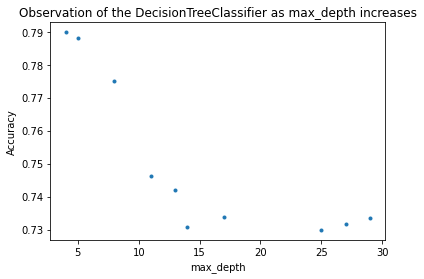

In [0]:
params = {'decisiontreeclassifier__max_depth': np.linspace(1, 32, 32, endpoint=True)}
DecisionTest = RandomizedSearchCV(model3, params)
DecisionTest.fit(X, y)
grid = DecisionTest.cv_results_
grid['mean_test_score']
grid['param_decisiontreeclassifier__max_depth']
plt.plot(grid['param_decisiontreeclassifier__max_depth'], grid['mean_test_score'],'.')
plt.title('Observation of the DecisionTreeClassifier as max_depth increases')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
DecisionTest.best_params_

#### Observing the effect of the `max_leaf_nodes` parameter



{'decisiontreeclassifier__max_leaf_nodes': 20}

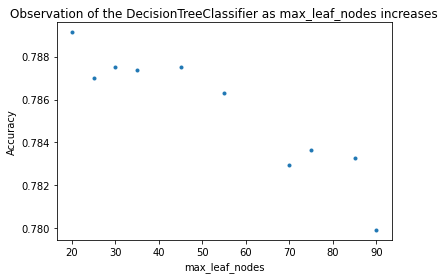

In [0]:
params = {'decisiontreeclassifier__max_leaf_nodes': np.arange(5,100,5)}
DecisionTest = RandomizedSearchCV(model3, params)
DecisionTest.fit(X, y)
grid = DecisionTest.cv_results_
grid['mean_test_score']
grid['param_decisiontreeclassifier__max_leaf_nodes']
plt.plot(grid['param_decisiontreeclassifier__max_leaf_nodes'], grid['mean_test_score'],'.')
plt.title('Observation of the DecisionTreeClassifier as max_leaf_nodes increases')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
DecisionTest.best_params_

#### Observing the effect of the `min_samples_split` parameter

{'decisiontreeclassifier__min_samples_split': 0.1}

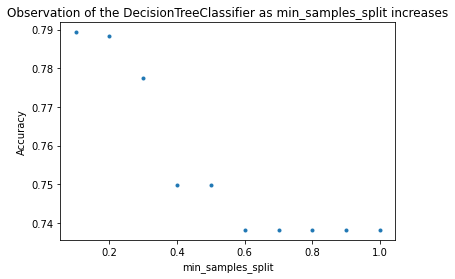

In [0]:
params = {'decisiontreeclassifier__min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)}
DecisionTest = RandomizedSearchCV(model3, params)
DecisionTest.fit(X, y)
grid = DecisionTest.cv_results_
grid['mean_test_score']
grid['param_decisiontreeclassifier__min_samples_split']
plt.plot(grid['param_decisiontreeclassifier__min_samples_split'], grid['mean_test_score'],'.')
plt.title('Observation of the DecisionTreeClassifier as min_samples_split increases')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
DecisionTest.best_params_

In [0]:
params = {'decisiontreeclassifier__max_depth': np.linspace(1, 32, 32, endpoint=True),
          'decisiontreeclassifier__max_leaf_nodes': np.arange(5,100,5),
          'decisiontreeclassifier__min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
          'decisiontreeclassifier__min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
          'decisiontreeclassifier__min_weight_fraction_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)
          }
DecisionTest = RandomizedSearchCV(model3, params)

In [0]:
DecisionTest.fit(X, y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('pipeline',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('simpleimputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                  

In [0]:
DecisionTest.best_params_

{'decisiontreeclassifier__max_depth': 7.0,
 'decisiontreeclassifier__max_leaf_nodes': 65,
 'decisiontreeclassifier__min_samples_leaf': 0.1,
 'decisiontreeclassifier__min_samples_split': 0.30000000000000004,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.1}

## Part 4

### Analyze performance of SVM with Polynomial Kernel

In [0]:
preprocessing = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numerical),
    (OneHotEncoder(handle_unknown='ignore'), categorical)
)

polysvm = make_pipeline(preprocessing, svm.SVC(kernel="poly"))

scores = cross_val_score(polysvm, X, y, scoring='accuracy')
print("Average Accuracy score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

Average Accuracy score: 0.79305 (+/- 0.02135)


### Analyze performance of SVM with Gaussian RBF Kernel

In [0]:
preprocessing = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numerical),
    (OneHotEncoder(handle_unknown='ignore'), categorical)
)

rbfsvm = make_pipeline(preprocessing, svm.SVC(kernel="rbf"))

scores = cross_val_score(rbfsvm, X, y, scoring='accuracy')
print("Average Accuracy score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

Average Accuracy score: 0.79659 (+/- 0.01534)


## Part 5

### Analyze Accuracy, Precision, Recall, ROC, and AUC Score

In [0]:
drop = ['Churn']
            
Xtest = df_test.drop(drop, axis=1)
ytest = df_test['Churn']

#### Logistic Regression

In [0]:
model1.fit(X, y)
ypred_logistic = model1.predict(X)
print('Train Accuracy:', accuracy_score(y, ypred_logistic))
print('Train Precision:', precision_score(y, ypred_logistic, pos_label='Yes'))
print('Train Recall Score:', recall_score(y, ypred_logistic, pos_label='Yes'))
print('\n')
#model1.fit(Xtest, ytest)
ytestpred_logistic = model1.predict(Xtest)
print('Test Accuracy:', accuracy_score(ytest, ytestpred_logistic))
print('Test Precision:', precision_score(ytest, ytestpred_logistic, pos_label='Yes'))
print('Test Recall Score:', recall_score(ytest, ytestpred_logistic, pos_label='Yes'))

Train Accuracy: 0.8040468583599574
Train Precision: 0.6661429693637078
Train Recall Score: 0.5553372626064178


Test Accuracy: 0.8183108587650816
Test Precision: 0.6303030303030303
Test Recall Score: 0.6081871345029239


Text(0.5, 1.0, 'Test Set Confusion Matrix')

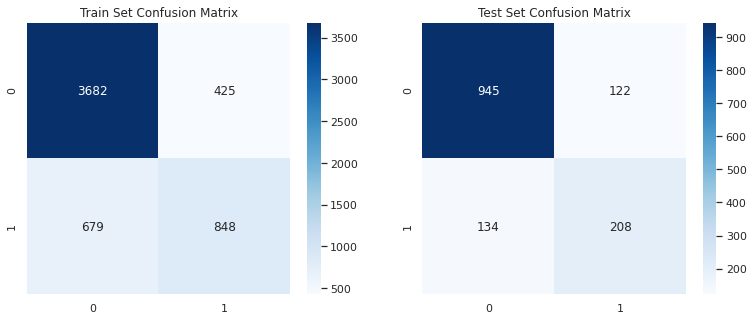

In [0]:
# Set up a subplot with a 1x2 axis
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5), sharex=False)
sns.despine(left=True)
# Create a confusion matrix
confusion_train = confusion_matrix(y, ypred_logistic)
confusion_test = confusion_matrix(ytest, ytestpred_logistic)
sns.heatmap(confusion_train, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
sns.heatmap(confusion_test, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')

#### Linear SVM

In [0]:
model4.fit(X, y)
ypred_linearsvm = model4.predict(X)
print('Train Accuracy:', accuracy_score(y, ypred_linearsvm))
print('Train Precision:', precision_score(y, ypred_linearsvm, pos_label='Yes'))
print('Train Recall Score:', recall_score(y, ypred_linearsvm, pos_label='Yes'))
print('\n')
#model4.fit(Xtest, ytest)
ytestpred_linearsvm = model4.predict(Xtest)
print('Test Accuracy:', accuracy_score(ytest, ytestpred_linearsvm))
print('Test Precision:', precision_score(ytest, ytestpred_linearsvm, pos_label='Yes'))
print('Test Recall Score:', recall_score(ytest, ytestpred_linearsvm, pos_label='Yes'))

Train Accuracy: 0.7994320198793042
Train Precision: 0.6591820368885325
Train Recall Score: 0.5383104125736738


Test Accuracy: 0.8168914123491838
Test Precision: 0.6304347826086957
Test Recall Score: 0.5935672514619883


Text(0.5, 1.0, 'Test Set Confusion Matrix')

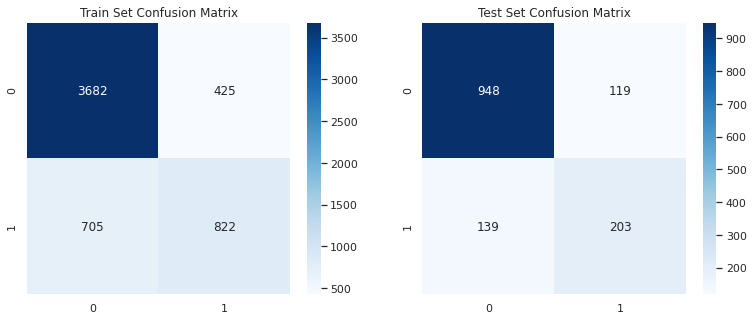

In [0]:
# Set up a subplot with a 1x2 axis
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5), sharex=False)
sns.despine(left=True)
# Create a confusion matrix
confusion_train = confusion_matrix(y, ypred_linearsvm)
confusion_test = confusion_matrix(ytest, ytestpred_linearsvm)
sns.heatmap(confusion_train, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
sns.heatmap(confusion_test, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')

#### Polynomial SVM

In [0]:
polysvm.fit(X, y)
ypred_polysvm = polysvm.predict(X)
print('Train Accuracy:', accuracy_score(y, ypred_polysvm))
print('Train Precision:', precision_score(y, ypred_polysvm, pos_label='Yes'))
print('Train Recall Score:', recall_score(y, ypred_polysvm, pos_label='Yes'))
print('\n')
#polysvm.fit(Xtest, ytest)
ytestpred_polysvm = polysvm.predict(Xtest)
print('Test Accuracy:', accuracy_score(ytest, ytestpred_polysvm))
print('Test Precision:', precision_score(ytest, ytestpred_polysvm, pos_label='Yes'))
print('Test Recall Score:', recall_score(ytest, ytestpred_polysvm, pos_label='Yes'))

Train Accuracy: 0.8184238551650692
Train Precision: 0.71875
Train Recall Score: 0.5422396856581533


Test Accuracy: 0.8126330731014905
Test Precision: 0.6392857142857142
Test Recall Score: 0.5233918128654971


Text(0.5, 1.0, 'Test Set Confusion Matrix')

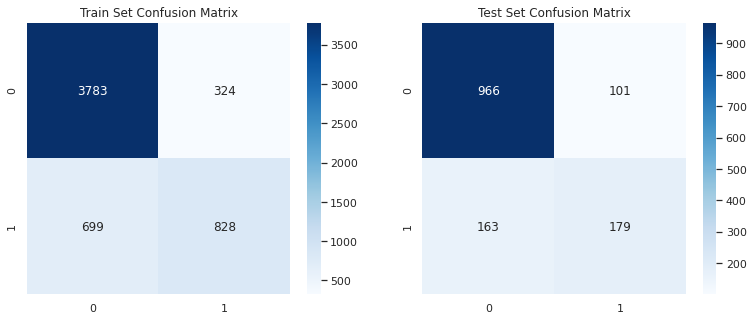

In [0]:
# Set up a subplot with a 1x2 axis
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5), sharex=False)
sns.despine(left=True)
# Create a confusion matrix
confusion_train = confusion_matrix(y, ypred_polysvm)
confusion_test = confusion_matrix(ytest, ytestpred_polysvm)
sns.heatmap(confusion_train, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
sns.heatmap(confusion_test, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')

#### RBF SVM

In [0]:
rbfsvm.fit(X, y)
ypred_rbfsvm = rbfsvm.predict(X)
print('Train Accuracy:', accuracy_score(y, ypred_rbfsvm))
print('Train Precision:', precision_score(y, ypred_rbfsvm, pos_label='Yes'))
print('Train Recall Score:', recall_score(y, ypred_rbfsvm, pos_label='Yes'))
print('\n')
#rbfsvm.fit(Xtest, ytest)
ytestpred_rbfsvm = rbfsvm.predict(Xtest)
print('Test Accuracy:', accuracy_score(ytest, ytestpred_rbfsvm))
print('Test Precision:', precision_score(ytest, ytestpred_rbfsvm, pos_label='Yes'))
print('Test Recall Score:', recall_score(ytest, ytestpred_rbfsvm, pos_label='Yes'))

Train Accuracy: 0.8129215477458289
Train Precision: 0.7121076233183856
Train Recall Score: 0.5199738048461034


Test Accuracy: 0.8197303051809794
Test Precision: 0.6527777777777778
Test Recall Score: 0.5497076023391813


Text(0.5, 1.0, 'Test Set Confusion Matrix')

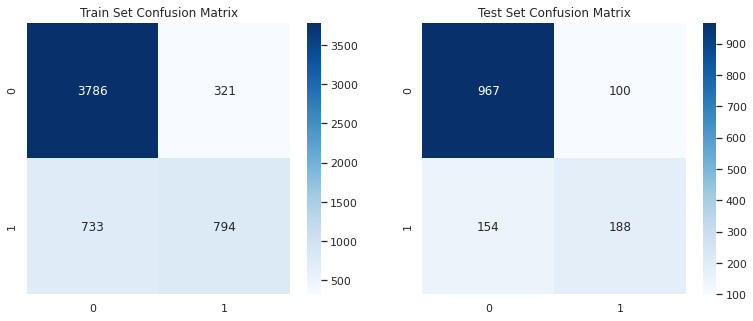

In [0]:
# Set up a subplot with a 1x2 axis
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5), sharex=False)
sns.despine(left=True)
# Create a confusion matrix
confusion_train = confusion_matrix(y, ypred_rbfsvm)
confusion_test = confusion_matrix(ytest, ytestpred_rbfsvm)
sns.heatmap(confusion_train, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
sns.heatmap(confusion_test, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')

#### kNN Classifier

In [0]:
model2.fit(X, y)
ypred_knn = model2.predict(X)
print('Train Accuracy:', accuracy_score(y, ypred_knn))
print('Train Precision:', precision_score(y, ypred_knn, pos_label='Yes'))
print('Train Recall Score:', recall_score(y, ypred_knn, pos_label='Yes'))
print('\n')
#rbfsvm.fit(Xtest, ytest)
ytestpred_knn = model2.predict(Xtest)
print('Test Accuracy:', accuracy_score(ytest, ytestpred_knn))
print('Test Precision:', precision_score(ytest, ytestpred_knn, pos_label='Yes'))
print('Test Recall Score:', recall_score(ytest, ytestpred_knn, pos_label='Yes'))

Train Accuracy: 0.8317358892438764
Train Precision: 0.7090252707581227
Train Recall Score: 0.6430910281597905


Test Accuracy: 0.7750177430801988
Test Precision: 0.5356125356125356
Test Recall Score: 0.5497076023391813


Text(0.5, 1.0, 'Test Set Confusion Matrix')

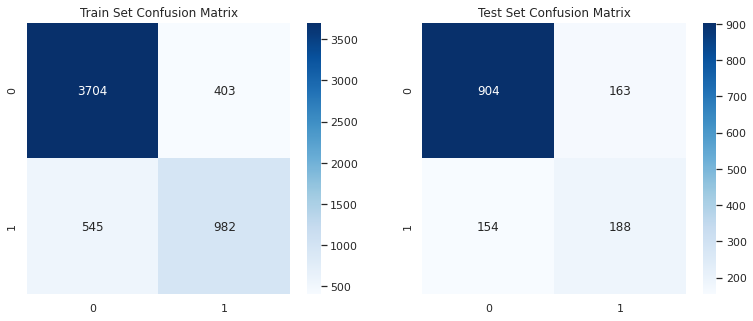

In [0]:
# Set up a subplot with a 1x2 axis
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5), sharex=False)
sns.despine(left=True)
# Create a confusion matrix
confusion_train = confusion_matrix(y, ypred_knn)
confusion_test = confusion_matrix(ytest, ytestpred_knn)
sns.heatmap(confusion_train, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
sns.heatmap(confusion_test, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')

#### Decission Tree Classifier

In [0]:
model3.fit(X, y)
ypred_decision = model3.predict(X)
print('Train Accuracy:', accuracy_score(y, ypred_decision))
print('Train Precision:', precision_score(y, ypred_decision, pos_label='Yes'))
print('Train Recall Score:', recall_score(y, ypred_decision, pos_label='Yes'))
print('\n')
#rbfsvm.fit(Xtest, ytest)
ytestpred_decision = model3.predict(Xtest)
print('Test Accuracy:', accuracy_score(ytest, ytestpred_decision))
print('Test Precision:', precision_score(ytest, ytestpred_decision, pos_label='Yes'))
print('Test Recall Score:', recall_score(ytest, ytestpred_decision, pos_label='Yes')) 

Train Accuracy: 0.9982250621228257
Train Precision: 1.0
Train Recall Score: 0.9934512115258677


Test Accuracy: 0.7310149041873669
Test Precision: 0.4524421593830334
Test Recall Score: 0.5146198830409356


Text(0.5, 1.0, 'Test Set Confusion Matrix')

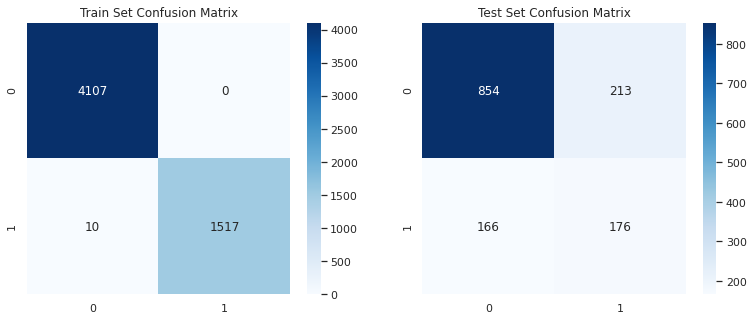

In [0]:
# Set up a subplot with a 1x2 axis
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5), sharex=False)
sns.despine(left=True)
# Create a confusion matrix
confusion_train = confusion_matrix(y, ypred_decision)
confusion_test = confusion_matrix(ytest, ytestpred_decision)
sns.heatmap(confusion_train, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
sns.heatmap(confusion_test, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')

### Best Model from Results

#### ROC Curves all the models

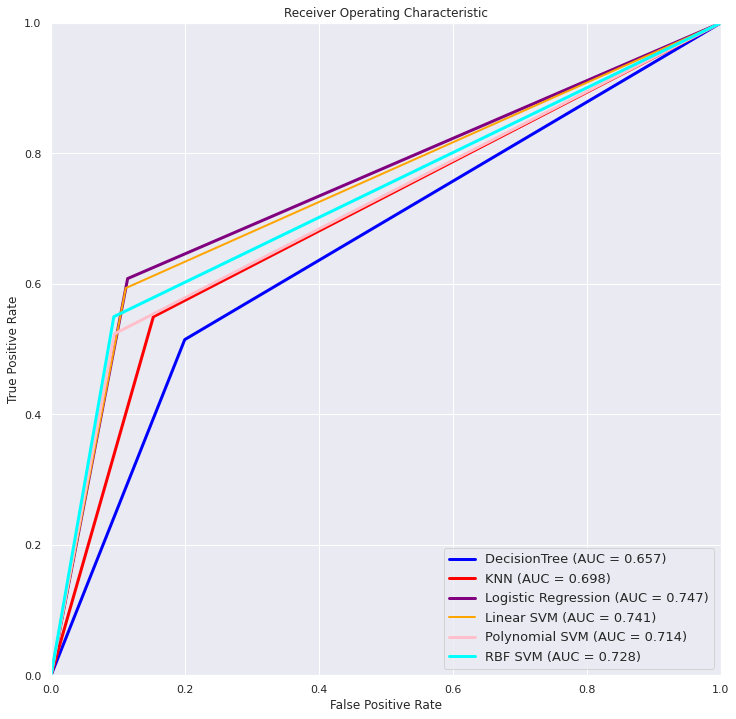

In [0]:
plt.figure(figsize=(12,12))

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(ytestpred_decision == 'Yes', 1, 0)))
plt.plot(fpr, tpr, color='blue', lw=3, label='DecisionTree (AUC = ' + 
         str(np.around(roc_auc_score(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                     pd.Series(np.where(ytestpred_decision == 'Yes', 1, 0)) ),3))+')')

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(ytestpred_knn == 'Yes', 1, 0)))
plt.plot(fpr, tpr, color='red', lw=3, label='KNN (AUC = ' + str(np.around(roc_auc_score(pd.Series(np.where(ytest == 'Yes', 1, 0)),pd.Series(np.where(ytestpred_knn == 'Yes', 1, 0)) ),3))+')')

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(ytestpred_logistic == 'Yes', 1, 0)))
plt.plot(fpr, tpr, lw=3, color='purple', label='Logistic Regression (AUC = ' + str(np.around(roc_auc_score(pd.Series(np.where(ytest == 'Yes', 1, 0)),pd.Series(np.where(ytestpred_logistic == 'Yes', 1, 0)) ),3))+')')

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(ytestpred_linearsvm == 'Yes', 1, 0)))
plt.plot(fpr, tpr, lw=2, color='orange', label='Linear SVM (AUC = ' + str(np.around(roc_auc_score(pd.Series(np.where(ytest == 'Yes', 1, 0)),pd.Series(np.where(ytestpred_linearsvm == 'Yes', 1, 0)) ),3))+')')

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(ytestpred_polysvm == 'Yes', 1, 0)))
plt.plot(fpr, tpr, lw=3, color='pink', label='Polynomial SVM (AUC = ' + str(np.around(roc_auc_score(pd.Series(np.where(ytest == 'Yes', 1, 0)),pd.Series(np.where(ytestpred_polysvm == 'Yes', 1, 0)) ),3))+')')

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(ytestpred_rbfsvm == 'Yes', 1, 0)))
plt.plot(fpr, tpr, lw=3, color='cyan', label='RBF SVM (AUC = ' + str(np.around(roc_auc_score(pd.Series(np.where(ytest == 'Yes', 1, 0)),pd.Series(np.where(ytestpred_rbfsvm == 'Yes', 1, 0)) ),3))+')')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right', fontsize=13)
plt.show()

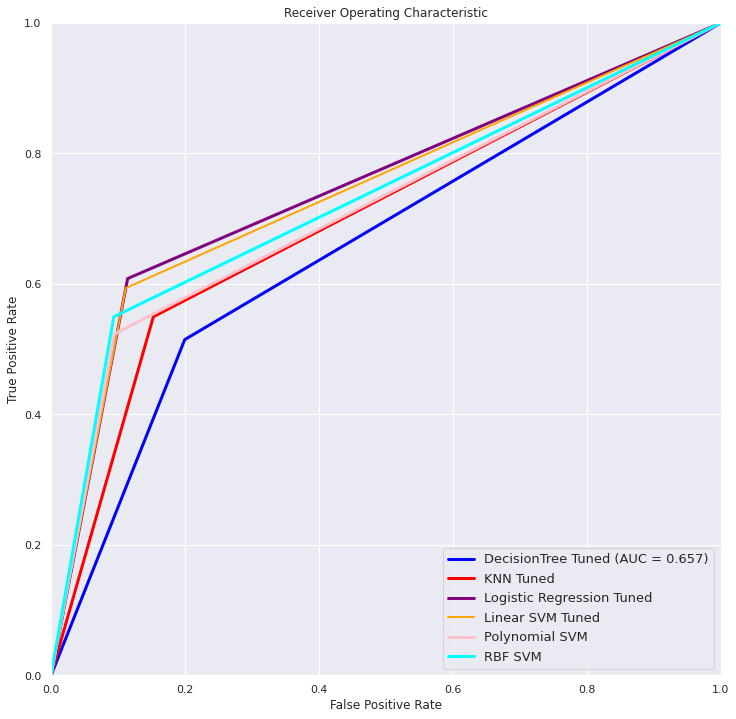

In [0]:
plt.figure(figsize=(12,12))

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(DecisionTest.estimator.predict(Xtest)
 == 'Yes', 1, 0)))
plt.plot(fpr, tpr, color='blue', lw=3, label='DecisionTree Tuned (AUC = ' + str(np.around(roc_auc_score(pd.Series(np.where(ytest == 'Yes', 1, 0)),pd.Series(np.where(DecisionTest.estimator.predict(Xtest) == 'Yes', 1, 0)) ),3))+')')

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(KNeighborTest.estimator.predict(Xtest) == 'Yes', 1, 0)))
plt.plot(fpr, tpr, color='red', lw=3, label='KNN Tuned')

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(LogisticTest.estimator.predict(Xtest) == 'Yes', 1, 0)))
plt.plot(fpr, tpr, lw=3, color='purple', label='Logistic Regression Tuned')

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(LinSVMTest.estimator.predict(Xtest) == 'Yes', 1, 0)))
plt.plot(fpr, tpr, lw=2, color='orange', label='Linear SVM Tuned')

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(ytestpred_polysvm == 'Yes', 1, 0)))
plt.plot(fpr, tpr, lw=3, color='pink', label='Polynomial SVM')

fpr, tpr, thresholds = roc_curve(pd.Series(np.where(ytest == 'Yes', 1, 0)),
                                 pd.Series(np.where(ytestpred_rbfsvm == 'Yes', 1, 0)))
plt.plot(fpr, tpr, lw=3, color='cyan', label='RBF SVM')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right', fontsize=13)
plt.show()

## Part 6

### Which types of customers are less likely to end the service?

In [0]:
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [0]:
features = []
genders = OneHotEncoder().fit(X[['gender']]).get_feature_names()
for i in genders:
  features.append('gender' + i)
senior = OneHotEncoder().fit(X[['SeniorCitizen']]).get_feature_names()
for i in senior:
  features.append('SeniorCitizen'+i)
partner = OneHotEncoder().fit(X[['Partner']]).get_feature_names()
for i in partner:
  features.append('Partner'+i)
dependents = OneHotEncoder().fit(X[['Dependents']]).get_feature_names()
for i in dependents:
  features.append('Dependents'+i)
features.append('tenure')
phone = OneHotEncoder().fit(X[['PhoneService']]).get_feature_names()
for i in phone:
  features.append('PhoneService'+i)
multiple = OneHotEncoder().fit(X[['MultipleLines']]).get_feature_names()
for i in multiple:
  features.append('MultipleLines'+i)
internet = OneHotEncoder().fit(X[['InternetService']]).get_feature_names()
for i in internet:
  features.append('InternetService'+i)
onsecure = OneHotEncoder().fit(X[['OnlineSecurity']]).get_feature_names()
for i in onsecure:
  features.append('OnlineSecurity'+i)
onbackup = OneHotEncoder().fit(X[['OnlineBackup']]).get_feature_names()
for i in onbackup:
  features.append('OnlineBackup'+i)
deviceprotect = OneHotEncoder().fit(X[['DeviceProtection']]).get_feature_names()
for i in deviceprotect:
  features.append('DeviceProtection'+i)
techsupport = OneHotEncoder().fit(X[['TechSupport']]).get_feature_names()
for i in techsupport:
  features.append('TechSupport'+i)
streamtv = OneHotEncoder().fit(X[['StreamingTV']]).get_feature_names()
for i in streamtv:
  features.append('StreamingTV'+i)
streammovie = OneHotEncoder().fit(X[['StreamingMovies']]).get_feature_names()
for i in streammovie:
  features.append('StreamingMovies'+i)
contract = OneHotEncoder().fit(X[['Contract']]).get_feature_names()
for i in contract:
  features.append('Contract'+i)
paper = OneHotEncoder().fit(X[['PaperlessBilling']]).get_feature_names()
for i in paper:
  features.append('PaperlessBilling'+i)
payment = OneHotEncoder().fit(X[['PaymentMethod']]).get_feature_names()
for i in payment:
  features.append('PaymentMethod'+i)
features.append('MonthlyCharges')
features.append('TotalCharges')

In [0]:
features

['genderx0_Female',
 'genderx0_Male',
 'SeniorCitizenx0_0',
 'SeniorCitizenx0_1',
 'Partnerx0_No',
 'Partnerx0_Yes',
 'Dependentsx0_No',
 'Dependentsx0_Yes',
 'tenure',
 'PhoneServicex0_No',
 'PhoneServicex0_Yes',
 'MultipleLinesx0_No',
 'MultipleLinesx0_No phone service',
 'MultipleLinesx0_Yes',
 'InternetServicex0_DSL',
 'InternetServicex0_Fiber optic',
 'InternetServicex0_No',
 'OnlineSecurityx0_No',
 'OnlineSecurityx0_No internet service',
 'OnlineSecurityx0_Yes',
 'OnlineBackupx0_No',
 'OnlineBackupx0_No internet service',
 'OnlineBackupx0_Yes',
 'DeviceProtectionx0_No',
 'DeviceProtectionx0_No internet service',
 'DeviceProtectionx0_Yes',
 'TechSupportx0_No',
 'TechSupportx0_No internet service',
 'TechSupportx0_Yes',
 'StreamingTVx0_No',
 'StreamingTVx0_No internet service',
 'StreamingTVx0_Yes',
 'StreamingMoviesx0_No',
 'StreamingMoviesx0_No internet service',
 'StreamingMoviesx0_Yes',
 'Contractx0_Month-to-month',
 'Contractx0_One year',
 'Contractx0_Two year',
 'PaperlessBil

In [0]:
importance = model1['logisticregression'].coef_[0]

#features = (numerical+categorical)
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (features[i],v))
model1['logisticregression'].classes_

Feature: genderx0_Female, Score: -1.33399
Feature: genderx0_Male, Score: -0.45610
Feature: SeniorCitizenx0_0, Score: 0.61989
Feature: SeniorCitizenx0_1, Score: 0.02986
Feature: Partnerx0_No, Score: -0.02799
Feature: Partnerx0_Yes, Score: -0.09389
Feature: Dependentsx0_No, Score: 0.09576
Feature: Dependentsx0_Yes, Score: -0.01721
Feature: tenure, Score: 0.01908
Feature: PhoneServicex0_No, Score: 0.08180
Feature: PhoneServicex0_Yes, Score: -0.07993
Feature: MultipleLinesx0_No, Score: 0.03441
Feature: MultipleLinesx0_No phone service, Score: -0.03254
Feature: MultipleLinesx0_Yes, Score: -0.19503
Feature: InternetServicex0_DSL, Score: 0.03441
Feature: InternetServicex0_Fiber optic, Score: 0.16249
Feature: InternetServicex0_No, Score: -0.45618
Feature: OnlineSecurityx0_No, Score: 0.62203
Feature: OnlineSecurityx0_No internet service, Score: -0.16398
Feature: OnlineSecurityx0_Yes, Score: 0.23874
Feature: OnlineBackupx0_No, Score: -0.16398
Feature: OnlineBackupx0_No internet service, Score: -

array(['No', 'Yes'], dtype=object)

Customers who are less likely to end their service are those who have the following features:

- Paperless Billing
- Female
- Automatic Bank Transer
- No Streaming Movies
- No Tech Support
- No Streaming TV
- No Internet Service